# Investigating the dataset

## Importing the necessary modules
pandas, matplotlib, and statsmodels to create linear models

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import statsmodels.api as sm
import numpy as np

### Reading in the dataset

In [2]:
heart_df = pd.read_csv('heart.csv')
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [3]:
c = heart_df.copy()
c.target.mean()

0.5445544554455446

In [4]:
c.target.value_counts()

1    165
0    138
Name: target, dtype: int64

We can see that the number of heart disease affected and not affected numbers are similar.

In [5]:
import seaborn as sns
sns.set(style="ticks")

In [6]:
import statsmodels.api as sm

In [7]:
c = heart_df.copy()
c['intercept'] = 1
log_mod = sm.Logit(c.target,c.drop('target',axis=1))
res = log_mod.fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.348904
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  303
Model:                          Logit   Df Residuals:                      289
Method:                           MLE   Df Model:                           13
Date:                Wed, 08 May 2019   Pseudo R-squ.:                  0.4937
Time:                        04:44:45   Log-Likelihood:                -105.72
converged:                       True   LL-Null:                       -208.82
                                        LLR p-value:                 7.262e-37
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0049      0.023     -0.212      0.832      -0.050       0.041
sex           -1.7582      0.469     -3.751      0.000      -2.677      -0.839
cp             0.8599      0.185      4.638      0.000       0.496       1.223
trestbps      -0.0195      0.010     -1.884      0.060      -0.040       0.001
chol          -0.0046      0.004     -1.224      0.221      -0.012       0.003
fbs            0.0349      0.529      0.066      0.947      -1.003       1.073
restecg        0.4663      0.348      1.339      0.181      -0.216       1.149
thalach        0.0232      0.010      2.219      0.026       0.003       0.044
exang         -0.9800      0.410     -2.391      0.017      -1.783      -0.177
oldpeak       -0.5403      0.214     -2.526      0.012      -0.959      -0.121
slope          0.5793      0.350      1.656      0.098      -0.106       1.265
ca            -0.7733      0.191     -4.051      0.000      -1.147      -0.399
thal          -0.9004      0.290     -3.104      0.002      -1.469      -0.332
intercept      3.4505      2.571      1.342      0.180      -1.590       8.490
==============================================================================
"""

The above output is the logistic regression output, taking into account all provided variables.
>To make further sense of this dataset, each variable needs to be understood and interpreted separately.

## Age
The p-value for age is 0.832, so age does not have a significant impact on the occurance of heart disease. At least according to this dataset.


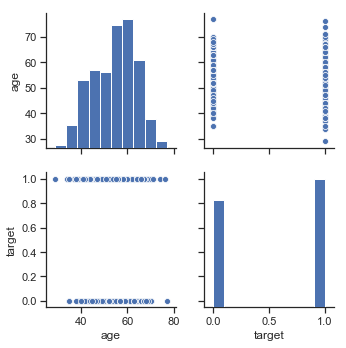

In [17]:
sns.pairplot(c[['age','target']])

## Sex
>Important

The p-value of 0.00 suggests that sex is a significant factor to predit heart disease cases

In [22]:
1/np.exp(-1.7582)

5.801984417594095

The value of the coefficient suggest that it is 5.8 times more likely of occurance of heart disease if the participant is a female rather than a male.

## CP - Chest Pain
>Important

The p-value is 0.00 suggesting that chest pain is a significant predictor

In [23]:
np.exp(0.8599)

2.362924389451834

For every point increase in chest pain type, heart disease is 2.36 times more likely to occur

In [ ]:
## 

# Checking assessment scores for logistic model
I am going to use sklearn package's built-ins to calculate accuracy, precision and recall scores for the model

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix

In [10]:
x_train, x_test, y_train, y_test = train_test_split(heart_df.drop('target',axis=1),heart_df.target,test_size = 0.3)
log_mod = LogisticRegression()
log_mod.fit(x_train, y_train)
y_pred = log_mod.predict(x_test)

C:\Python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Accuracy scores
Calculate the evaluation metrics for the logistic model (initial level)

In [11]:
confusion_matrix(y_test,y_pred)

array([[31, 13],
       [ 3, 44]], dtype=int64)

In [12]:
accuracy_score(y_test, y_pred)

0.8241758241758241

82 % is the complete accuracy level of the model

In [13]:
recall_score(y_test, y_pred)

0.9361702127659575

This means 93.6 % of actual heart disease cases are correctly predicted by the model

In [14]:
precision_score(y_test, y_pred)

0.7719298245614035

77 % of the predicted heart disease affected patients actually have heart disease

## Plotting using seaborn

In [15]:
import seaborn as sns

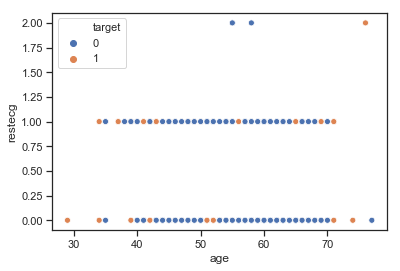

In [17]:
ax = sns.scatterplot(x="age", y="restecg",hue = 'target', data=heart_df)